In [1]:
# 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
# 导入数据
data_train = pd.read_csv('train_data.csv')
target = data_train['tradeMoney']
data_test = pd.read_csv('test_a.csv')
# 合并数据
data_all = pd.concat([data_train, data_test])

# 缺失值分析及处理
经过之前的初步EDA得知，这份数据中仅两个变量pv、uv存在缺失值，部分变量没有出现“nan”，但变量的值也没有具体告知；部分变量数据类型不符合实际，也需要处理。

In [23]:
# 数值变量
# pv、uv
data_train['pv'].fillna(data_train['pv'].mean(), inplace = True)
data_train['uv'].fillna(data_train['uv'].mean(), inplace = True)
data_train['pv'] = data_train['pv'].astype('int')
data_train['uv'] = data_train['uv'].astype('int')
# buildYear
buildYear_mode = pd.DataFrame(data_train[data_train['buildYear'] != '暂无信息']['buildYear'].mode())
data_train.loc[data_train[data_train['buildYear'] == '暂无信息'].index, 'buildYear'] = buildYear_mode.iloc[0,0]
data_train['buildYear'] = data_train['buildYear'].astype('int')
# 分类变量：rentType、houseFloor
data_train[data_train['rentType'] == '--'] = '未知方式'
data_train[data_train['houseFloor'] == '未知方式'] = '中'


In [25]:
# 分类数据编码
categorical = [f for f in data_train.columns if data_train.dtypes[f] == 'object'][:-2]
for feature in categorical:
        data_train[feature] = LabelEncoder().fit_transform(data_train[feature])



In [91]:
# 处理日期变量
data_train['month'] = data_train['tradeTime'].str.split('/', expand = True)[1]
data_train['day'] = data_train['tradeTime'].str.split('/', expand = True)[2]
# 删除无用变量
data_train.drop('city', axis=1, inplace=True)
data_train.drop('tradeTime', axis=1, inplace=True)
data_train.drop('ID', axis=1, inplace=True)

# 异常值处理
目标变量tradeMoney，area，landTotalPrice, supplyLandArea, totalFloor, totalNewTradeArea, totalNewTradeMoney这类连续变量做异常值分析
   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CE476A0>,
      dtype=object)

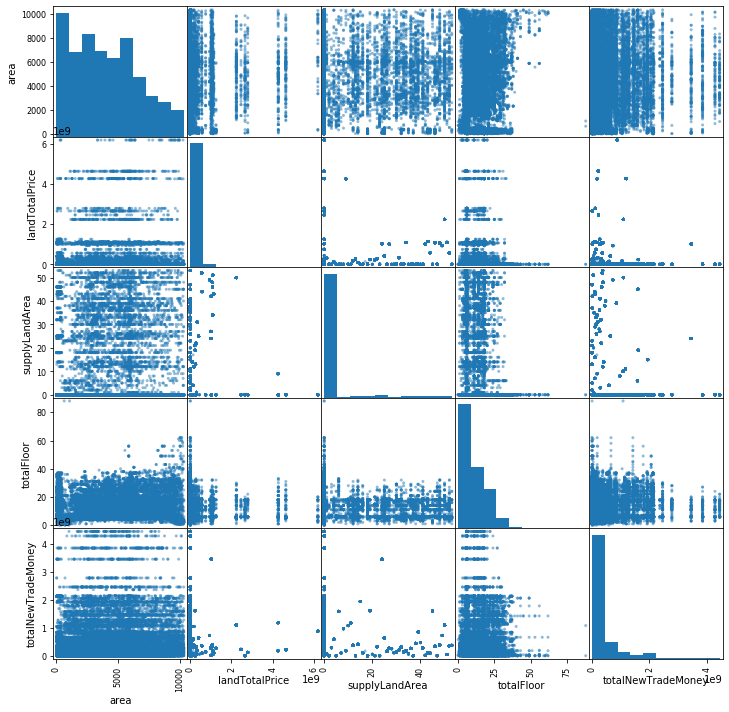

In [92]:
attributes = ['tradeMoney', 'area',  'landTotalPrice', 'supplyLandArea', 'totalFloor', 'totalNewTradeMoney']
pd.plotting.scatter_matrix(data_train[attributes], figsize = (12,12))

In [97]:
# 对目标变量tradeMoney做异常值清洗
cla = OneClassSVM(gamma='auto').fit(data_train['tradeMoney'].values.reshape(-1,1))
target_cla = cla.predict(data_train['tradeMoney'].values.reshape(-1,1))
drop_index = data_train.loc[target_cla == -1].index
data_train.drop(drop_index, inplace = True)

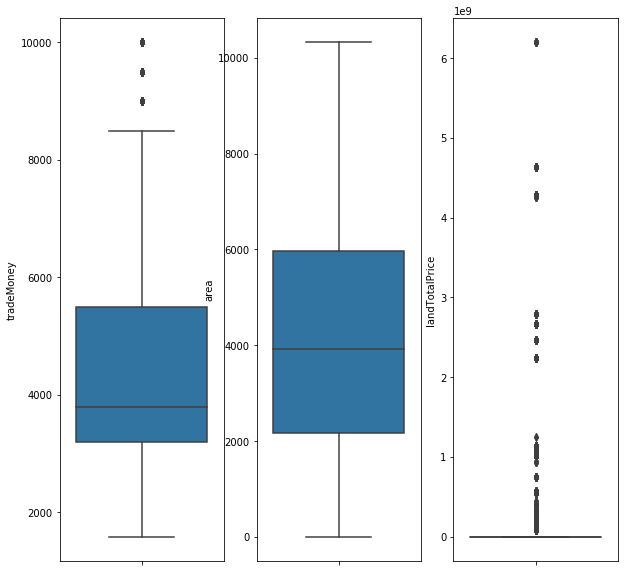

In [98]:
f,axes=plt.subplots(1,3,figsize=(10,10))
sns.boxplot(y = 'tradeMoney', data = data_train, ax = axes[0])
sns.boxplot(y = 'area', data = data_train, ax = axes[1])
sns.boxplot(y = 'landTotalPrice', data = data_train, ax = axes[2])

经过OneClassSVM处理后目标变量明显减少异常点数量，但area等变量，仍存在大量异常

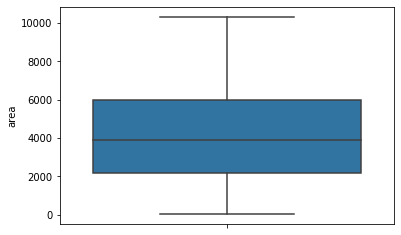

In [99]:
# 分位数处理
# area变量
Percentile = np.percentile(data_train['area'],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+IQR*1.5
DownLimit = Percentile[1]-IQR*1.5

data_train.drop(data_train[(data_train['area'] > UpLimit)].index, inplace = True)
sns.boxplot(y = 'area', data = data_train)

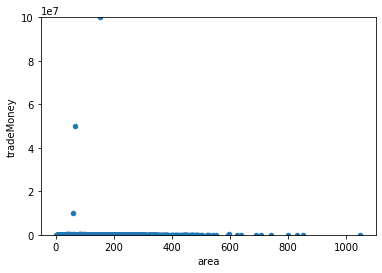

In [36]:
# tradeMoney/area
data = pd.concat([data_train['tradeMoney'], data_train['area']], axis=1)
data.plot.scatter(x= 'area', y='tradeMoney', ylim=(0,data_train['tradeMoney'].max()))

In [40]:
#删除异常点
data_train.sort_values(by = 'area', ascending = False)[:10]
data_train = data_train.drop(data_train[data_train.index == 297].index)
data_train = data_train.drop(data_train[data_train.index == 6517].index)
data_train = data_train.drop(data_train[data_train.index == 1473].index)
data_train = data_train.drop(data_train[data_train.index == 34084].index)
data_train = data_train.drop(data_train[data_train.index == 570].index)
data_train = data_train.drop(data_train[data_train.index == 17773].index)
data_train = data_train.drop(data_train[data_train.index == 16877].index)
data_train = data_train.drop(data_train[data_train.index == 6897].index)
data_train = data_train.drop(data_train[data_train.index == 36225].index)
data_train = data_train.drop(data_train[data_train.index == 1277].index)


data_train.sort_values(by = 'tradeMoney', ascending = False)[:3]
data_train = data_train.drop(data_train[data_train.index == 36710].index)
data_train = data_train.drop(data_train[data_train.index == 32734].index)
data_train = data_train.drop(data_train[data_train.index == 30167].index)


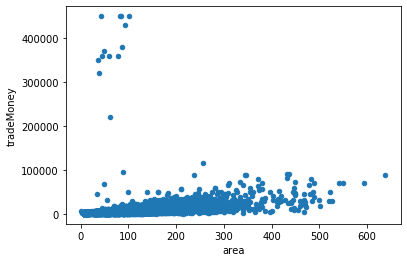

In [41]:
data = pd.concat([data_train['tradeMoney'], data_train['area']], axis=1)
data.plot.scatter(x= 'area', y='tradeMoney')